# 0 概述
- **目标**：实现用神经网络来实现逻辑回归分类，并对深度学习有一个初步且直观的理解。
- **具体实施方案**：构建神经网络来识别猫。
- **你将学会**：
    - 构建学习算法的常规框架，包括:
        - 初始化参数
        - 计算损失函数（cost function）及其梯度（gradient）
        - 使用梯度下降法进行优化
    - 将上述三种功能函数，以正确的顺序整合成一个训练模型

# 1 - 包
- [numpy](https://numpy.org/doc/1.20/) ：科学计算
- [h5py](http://www.h5py.org)：存储、读取 H5 格式文件（保存了数据库）
- [matplotlib](http://matplotlib.org)：画图
- [PIL](https://pypi.org/project/Pillow/) ：读取图片。PIL全称是Python Imaging Library，python 2.7以后不再支持。pillow是PIL模块的一个派生分支，如今已经发展成为比PIL更具活力的图像处理库。

In [1]:
import numpy as np
import h5py

import copy
import matplotlib.pyplot as plt
from PIL import Image
from lib_lr_utils import load_dataset
from lib_public_tests import *

# 确保matplotlib的图表直接嵌入到Notebook之中
%matplotlib inline
# 确保在Notebook中使用最新的模块
%load_ext autoreload
%autoreload 2

# 2 - 问题预览
- **问题描述**: 给定数据库("*.h5")中包含
    - 具有 m_train 张图片的训练集，每一张被标记为 猫 (y=1) 或者 非猫 (y=0)
    - 具有 m_test 张图片的测试集，每一张被标记为 猫 (y=1) 或者 非猫 (y=0)
    - 每张图片的尺寸/形状为 (num_px, num_px, 3)，其中的 3 表示 RGB 三通道
- **目标**：构建一个简单的图片识别算法来正确的区分 “猫” 与 “非猫”

* 首先来看数据集，运行下面的代码来加载数据

In [16]:
# Loading the data (cat/non-cat)
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_dataset()

运行下面的代码可视化 train_set_x 和 test_set_x 中的图片数据，修改 `index` 值可以在不同图片间进行切换。

y = [1], it's a 'cat' picture.


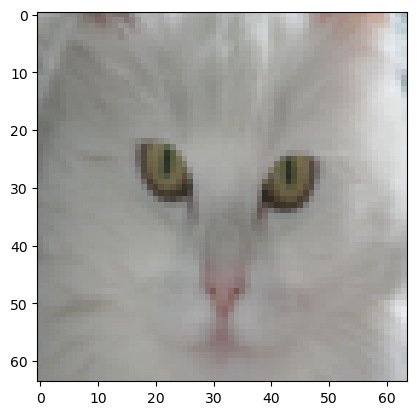

In [17]:
# Example of a picture
index = 50
plt.imshow(train_set_x[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + 
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [18]:
# 思考：为什么需要np.squeeze？
print(train_set_y.shape)
print(np.squeeze(train_set_y).shape) # np.squeeze() 将删除数组形状中的单维度条目，即把shape中为1的维度去掉

print(np.squeeze(train_set_y[:, index]))
print(train_set_y[:, index])

(1, 209)
(209,)
1
[1]


## 练习 1 - 理解数据维度
- **目标**：深度学习中的许多问题出在 矩阵/向量 数据的维度不匹配，接下来请获取下列信息并了然于心:
    - m_train (训练集数据量)
    - m_test (测试集数据量)
    - num_px (训练数据的宽/高)
- 提示：`train_set_x` 是一个形状为 (m_train, num_px, num_px, 3) 的numpy数组

In [19]:
#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 
# YOUR CODE STARTS HERE
m_train = train_set_x.shape[0]
m_test =  test_set_x.shape[0]
num_px = train_set_x.shape[1]
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


## 练习 2 - Reshape
- **目标**：使得形状为 (num_px, num_px, 3) 的图片数据展开为（num_px $*$ num_px $*$ 3, 1）的列向量；对于训练集（测试集）来说，其中应该有 m_train（m_test）列这样的数据。

- 提示：可以使用如下代码将一个形状为 (a,b,c,d) 的矩阵 X 改变为形状为 (b $*$ c $*$ d, $a$) 的矩阵 X_flatten:
```
        # X.T 表示 X 的转置
        X_flatten = X.reshape(X.shape[0], -1).T
```

In [25]:
# Reshape the training and test examples
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0],-1).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0],-1).T

# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

在数字图像中，每个通道的像素值是 0 到 255 的整数，机器学习中的一项普遍预处理是对数据进行中心化和标准化（归一化），对于数字图像来说就是将每行除以其最大值（即255）。

In [26]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<font color='blue'>
    
    
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

# 3 - 模型框架
下面将构建一个如下图所示的逻辑回归模型   
<img src="images/LogReg_kiank.png" width=1000>

## 3.1 理论基础

- 对于一个样本 $x^{(i)}$ 来说:
    - 线性组合 $z^{(i)} = w^T x^{(i)} + b \tag{1}$
    - 激活函数 $\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$
    - 损失（Loss）函数 $ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$

- 对于整个训练集来说：
    - 代价（Cost）函数 $ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$

## 3.2 关键步骤
- 初始化模型参数
- 通过最小化代价函数进行模型参数学习
- 使用学习到的参数在测试集上进行预测
- 对实验结果进行分析并总结

# 4 - 构建本实验算法的各个部分

- 主要步骤：
    1. 定义模型结构（例如输入特征的数量）
    2. 初始化模型参数
    3. 执行循环：
        - 计算当前轮代价（前向传播）
        - 计算当前轮梯度（反向传播）
        - 更新参数（梯度下降）
- 可以分别实现 1-3 步骤，然后将他们整合到一个名为 `model()` 的函数中

## 4.1 - 初始化参数

### 练习 3 - initialize_with_zeros
- **目标**：将变量 w 初始化为一个全零的向量，b初始化为 0 
- 提示：使用 np.zeros() 函数

In [29]:
"""
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
"""   
def initialize_with_zeros(dim):     
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim,1))
    b =0.0
    # YOUR CODE ENDS HERE
    return w, b

In [30]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test(initialize_with_zeros)

w = [[0.]
 [0.]]
b = 0.0
All tests passed!


## 4.2 - 前向传播和反向传播

### 练习 4 - sigmoid
- **目标**：实现一个sigmoid函数（参考实验0中的代码`sigmoid()`）。在前向传播中需要调用该函数作为激活函数，即 $sigmoid(z) = \frac{1}{1 + e^{-z}}$，其中 $z = w^T x + b$。

In [31]:
"""
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
"""
def sigmoid(z):
    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s=1/(1+np.exp(-z))

    # YOUR CODE ENDS HERE
    
    return s

In [32]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
All tests passed!


### 练习 5 - propagate
- **目标**：实现函数 `propagate()` 用来计算代价函数和它的梯度
- **提示**：
1. 前向传播
    - 输入 X 和 Y
    - 计算 $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, \cdots, a^{(m-1)}, a^{(m)})$
    - 计算代价函数（交叉熵）： $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$
2. 梯度计算
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

In [33]:
"""
Function:
    Implement the cost function and its gradient for the propagation explained above
Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b    
Tips:
    Write your code step by step for the propagation. np.log(), np.dot()
"""
def propagate(w, b, X, Y):    
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # A = ...
    # cost = ...                                
    # YOUR CODE STARTS HERE
    train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0],-1).T
    A=sigmoid(np.dot(w.T,X)+b)
    cost=np.sum(((-np.log(A))*Y+(-np.log(1-A))*(1-Y)))/m
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    # YOUR CODE ENDS HERE
    
    #cost = np.squeeze(np.array(cost))    # np.squeeze() 将删除数组形状中的单维度条目，即把shape中为1的维度去掉
    grads = {"dw": dw,
             "db": db}    
    return grads, cost

In [34]:
w =  np.array([[1.], [2.]])
b = 2.
X =np.array([[1., 2., -1.], [3., 4., -3.2]])
Y = np.array([[1, 0, 1]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
All tests passed!


**Expected output**

```
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
```

## 4.3 - 优化
### 练习 6 - optimize
- **目标**：通过最小化代价函数 $J$  来学习 $w$ 和 $b$。对于一个参数 $\theta$，更新规则是 $ \theta = \theta - \alpha \text{ } d\theta$，其中 $\alpha$ 是学习率。

In [35]:
"""
Function:
    This function optimizes w and b by running a gradient descent algorithm    
Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
"""    
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)    
    costs = []    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost) 
            if print_cost: # Print the cost every 100 training iterations
                print ("Cost after iteration {}: {}".format(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [36]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654
Costs = [5.801545319394553]
All tests passed!


### 练习 7 - predict
- **目标**：实现一个函数 `predict()`，包含2步
    1. 计算 $\hat{Y} = A = \sigma(w^T X + b)$
    2. 将结果转换为 0 当 activation <= 0.5；或者 1 当 activation > 0.5)，将其存储在向量 `Y_prediction` 中。

In [37]:
'''
Function:
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)    
Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
'''
def predict(w, b, X):        
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X) + b)
    # YOUR CODE ENDS HERE    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        Y_prediction = (A >= 0.5) * 1.0
        # YOUR CODE ENDS HERE
    return Y_prediction

In [38]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
All tests passed!


<font color='blue'>
    
**What to remember:**
    
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - Computing the cost and its gradient 
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

# 5 - 整合所有函数

## 练习 8 - model
- **目标**：实现一个函数 `model` ，按正确的顺序整合调用上述函数

In [39]:
"""
Function:
    Builds the logistic regression model by calling the function you've implemented previously
Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
Returns:
    d -- dictionary containing information about the model.
"""
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    
    # YOUR CODE STARTS HERE 
    # 初始化参数为全0值 (≈ 1 line of code)   
    w, b = initialize_with_zeros(X_train.shape[0])
     
    # 梯度下降 (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # 获取训练好的模型参数
    w = parameters["w"]
    b = parameters["b"]
    
    # 对测试集和训练集进行预测 (≈ 2 lines of code)
      
    # YOUR CODE ENDS HERE
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # 计算并打印准确率
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)) 
    
    # 最终的返回信息包括：代价，训练集和测试集上的输出，参数和偏置，学习率和迭代次数
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [40]:
model_test(model)

All tests passed!


If you pass all the tests, run the following cell to train your model.

In [41]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5845083636993086
Cost after iteration 200: 0.46694904094655476
Cost after iteration 300: 0.37600686694802077
Cost after iteration 400: 0.33146328932825125
Cost after iteration 500: 0.30327306747438293
Cost after iteration 600: 0.27987958658260487
Cost after iteration 700: 0.2600421369258757
Cost after iteration 800: 0.24294068467796626
Cost after iteration 900: 0.22800422256726066
Cost after iteration 1000: 0.2148195137844964
Cost after iteration 1100: 0.20307819060644985
Cost after iteration 1200: 0.19254427716706857
Cost after iteration 1300: 0.18303333796883509
Cost after iteration 1400: 0.17439859438448876
Cost after iteration 1500: 0.16652139705400335
Cost after iteration 1600: 0.15930451829756614
Cost after iteration 1700: 0.152667324712965
Cost after iteration 1800: 0.14654223503982342
Cost after iteration 1900: 0.1408720757031016
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


- **分析**: 
    - 训练集准确率接近100%。表明该模型在训练集上面是有效的。 
    - 测试集准确性为70%。作为一个简单的模型来说，准确率还算不错，后续将构建更好的分类器。
- **结论**：
    - 过拟合
    - 可以使用正则化方法来降低过拟合
- 使用下面的代码查看预测结果(通过改变 `index` 变量的值可以在不同测试图片间进行切换)

y = 1, you predicted that it is a "cat" picture.


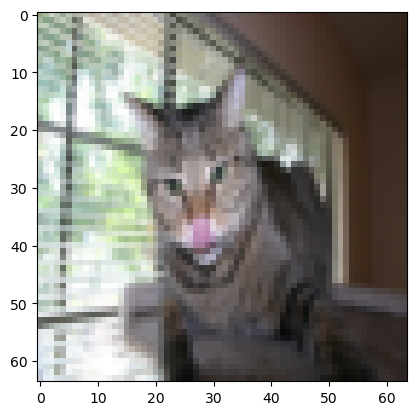

In [42]:
# Example of a picture that was wrongly classified.
index = 20
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

可视化代价变化

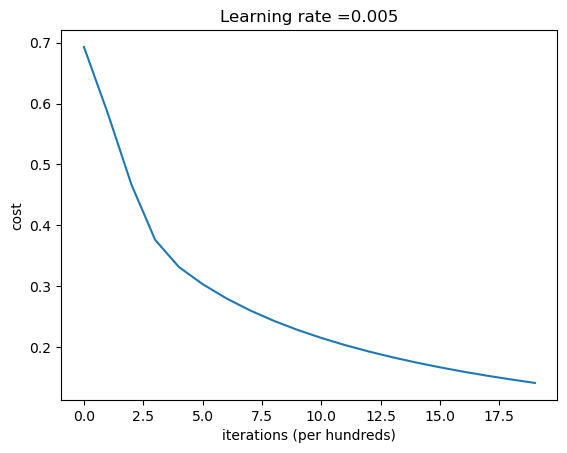

In [43]:
# Plot learning curve (with costs)
# costs = np.squeeze(logistic_regression_model['costs'])
costs = logistic_regression_model['costs']
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

# 6 - 分析 (optional/ungraded exercise)

## 6.1 学习率选取

- 在进行梯度下降时需要我们合理选择学习率$\alpha$，其决定了参数更新的速度
- 如果过大，可能会"overshoot"最优值；反之，则需要更多次的迭代才能收敛至最优值。因此微调学习率非常关键

下面将对比三组不同学习率下的代价曲线

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



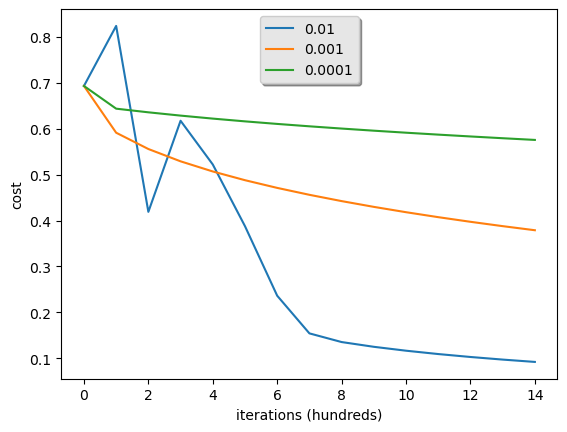

In [44]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

- **解读**: 
    - 当学习率较大时(0.01)，代价曲线会上下震荡 
    - 较低的代价并不一定就是一个好的模型，也可能是过拟合
- **建议**：
    - 选择能最小化代价函数的学习率
    - 如果出现过拟合问题，使用正则化方法减少过拟合


# 7 - 测试自己的图片 (optional/ungraded exercise) ##

将自己的图片存放到本Notebook的同一级目录下的images子目录中，修改下面代码中的`my_image`变量为对应的文件名并运行代码

y = 0.0, your algorithm predicts a "non-cat" picture.


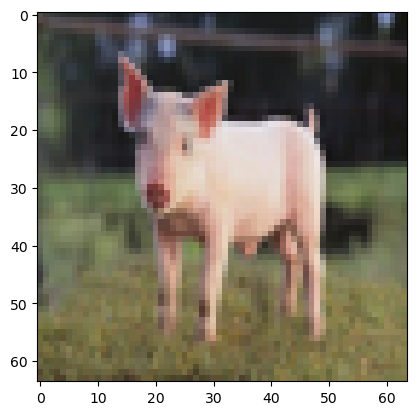

In [45]:
# change this to the name of your image file
my_image = "1.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px))) # 使用PIL库的Image类
plt.imshow(image)
image = image / 255.
# image = image.reshape((1, num_px * num_px * 3)).T
image = image.reshape((num_px * num_px * 3, 1 ))
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + 
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
    
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c